# ***NFL Quarterback Statistical Analysis***
### *Tyson Grant - 100875284*

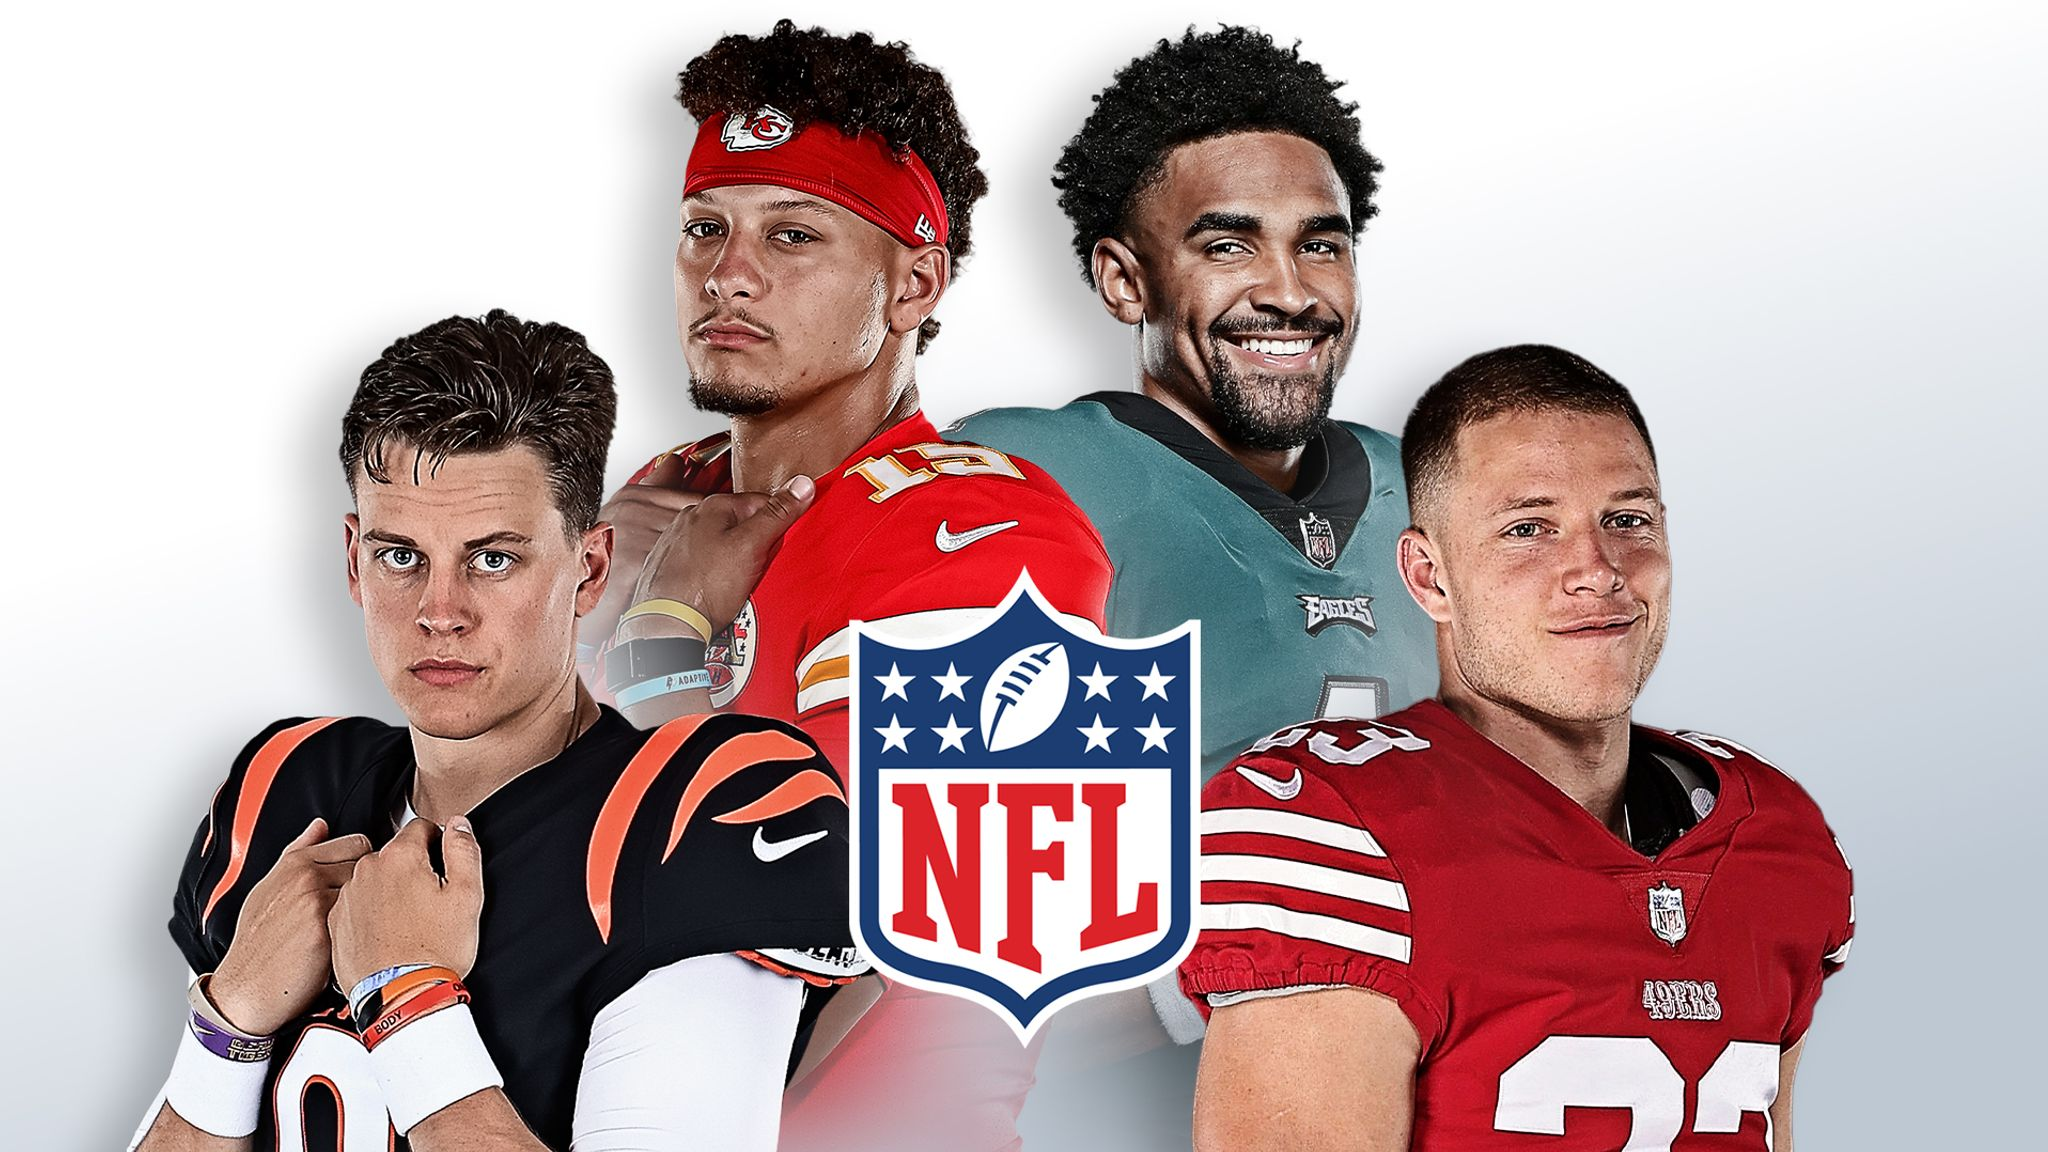

## Introduction

***"Quarterbacks: where strategy meets precision, and every throw tells a story of determination and leadership"***

In the exhilarating realm of football, the quarterback is the heart of the team.  Like the maestro in an orchestra, they conduct a symphony of the game, harmonizing between talents and creating a captivating performance.  This Statistical Analysis will only scratch the surface of an otherwise deep dive into the Quarterbacks in the National Football League (NFL) from the football seasons over the last few decades.  The most recent season examined is the 2016 season and we will be reaching as far back as the 1970 season.  To make this assignment more effective and user-friendly, I decided to use two different CSV files (from the same data set) allowing for my assignment to give more information and comparisons than the average statistical analysis.  The Quarterback Statistics CSV only consisted of statistics (passes attempted, fumbles, sacks, etc) from games, whereas the Basic Statistics CSV contained only player information (height, weight, experience, team).  

I chose this topic because football has always been of interest to me.  Whether it be when I played in high school, or watching games with my family, I have always had a certain investment in the sport.  I believe it has many different angles you can analyze from, such as the fields being played on, the chemistry of the team, the body structure of the players, etc.  The dataset used in this analysis was retrieved from the Kaggle data repository.  The dataset comprised multiple CSV files for statistics of each position, but I only used the CSV files named Basic_Stats and Game_Logs_Quarterback.

The end game for this assignment is to understand how the 'Home Field Advantage' affects the outcome of an American Football match, as well as the average age and experience a player has before reaching the 'peak' of their football career.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
basic_stats = pd.read_csv('Basic_Stats.csv')
qb_stats = pd.read_csv('Game_Logs_Quarterback.csv')

## Cleaning Data

### Cleaning Basic Stats CSV

In [3]:
print(basic_stats.shape)

(17172, 16)


Basic Statistics before cleaning:

In [4]:
basic_stats

Age        Birth Place    Birthday           College Current Status  \
0       NaN  Grand Rapids , MI   5/23/1921        Notre Dame        Retired   
1       NaN        Dayton , OH  12/21/1930            Dayton        Retired   
2      56.0        Temple , TX   9/11/1960    Louisiana Tech        Retired   
3      30.0   New Orleans , LA   9/30/1986               LSU        Retired   
4      25.0       Detroit , MI   3/31/1992  Central Michigan         Active   
...     ...                ...         ...               ...            ...   
17167  73.0       Detroit , MI   2/15/1944    Michigan State        Retired   
17168  32.0       Worland , WY   8/19/1984       Weber State        Retired   
17169  43.0    Washington , DC    5/4/1974             Akron        Retired   
17170   NaN   New Willard , TX   3/30/1921            Baylor        Retired   
17171  54.0         Bryan , TX  10/21/1962            Baylor        Retired   

              Current Team  Experience  Height (inches)     High School  \
0                      NaN   3 Seasons             71.0             NaN   
1                      NaN    1 Season             70.0             NaN   
2                      NaN    1 Season             74.0             NaN   
3                      NaN   5 Seasons             73.0             NaN   
4      Pittsburgh Steelers  3rd season             77.0  Clintondale HS   
...                    ...         ...              ...             ...   
17167                  NaN    1 Season             71.0             NaN   
17168                  NaN    1 Season             75.0             NaN   
17169                  NaN    1 Season             72.0             NaN   
17170                  NaN   2 Seasons             73.0             NaN   
17171                  NaN    1 Season             73.0             NaN   

              High School Location            Name  Number  \
0                              NaN     Evans, Fred     NaN   
1                              NaN      Raiff, Jim     NaN   
2                              NaN   Fowler, Bobby     NaN   
3                              NaN  Johnson, Quinn     NaN   
4      Clinton Twp.,Macomb Co., MI    Walton, L.T.    96.0   
...                            ...             ...     ...   
17167                          NaN    Goovert, Ron     NaN   
17168                          NaN    Folsom, J.D.     NaN   
17169                          NaN   Reader, Jamie     NaN   
17170                          NaN  Barnett, Solon     NaN   
17171                          NaN  Johnson, Byron     NaN   

                  Player Id Position  Weight (lbs) Years Played  
0         fredevans/2513736      NaN         185.0  1946 - 1948  
1          jimraiff/2523700      NaN         235.0  1954 - 1954  
2       bobbyfowler/2514295      NaN         230.0  1985 - 1985  
3        quinnjohnson/79593      NaN         255.0  2009 - 2013  
4        l.t.walton/2552444       DE         305.0          NaN  
...                     ...      ...           ...          ...  
17167    rongoovert/2515082      NaN         225.0  1967 - 1967  
17168     j.d.folsom/238485      NaN         230.0  2009 - 2010  
17169   jamiereader/2502599      NaN         238.0  2001 - 2001  
17170  solonbarnett/2509044      NaN         235.0  1945 - 1946  
17171  byronjohnson/2517578      NaN         220.0  1987 - 1987  

[17172 rows x 16 columns]

Formatting Age to Remove Decimal

In [5]:
basic_stats['Age'] = basic_stats['Age'].round(0)

Drops Rows containing missing data under Age column

Logical for other columns to have missing data since some of the players have passed away

In [6]:
# Drops rows with NaN Age values since those will not help in the analyses
basic_stats = basic_stats.dropna(axis=0, subset='Age')

# Filtering/focusing on just the players in the Quarterback position
basic_stats = basic_stats[basic_stats['Position'] == 'QB']

Basic Statistics of Quarterbacks Table

In [7]:
basic_stats

Age           Birth Place    Birthday               College  \
72     27.0  Clifton Heights , PA   4/26/1990            Pittsburgh   
222    25.0           Alpine , TX    9/6/1991         Texas-El Paso   
636    22.0       Alpharetta , GA   1/26/1995             Tennessee   
900    24.0        Cleveland , OH   1/29/1993        Michigan State   
1405   24.0       Northridge , CA    2/9/1993         Arizona State   
...     ...                   ...         ...                   ...   
16832  24.0                   NaN   8/27/1992          Miami (Fla.)   
16869  24.0          Absecon , NJ    6/4/1993        Wesley College   
16992  27.0           Conroe , TX  12/12/1989  North Carolina State   
17081  33.0            Chico , CA   12/2/1983            California   
17116  26.0    Coeur d'alene , ID  11/22/1990         Arizona State   

      Current Status          Current Team   Experience  Height (inches)  \
72            Active        Houston Texans   4th season             76.0   
222           Active        Dallas Cowboys   1st season             74.0   
636           Active   Pittsburgh Steelers       Rookie             75.0   
900           Active       Oakland Raiders   2nd season             76.0   
1405          Active  Los Angeles Chargers       Rookie             72.0   
...              ...                   ...          ...              ...   
16832         Active    Indianapolis Colts   1st season             74.0   
16869         Active     Green Bay Packers   2nd season             73.0   
16992         Active         Chicago Bears   5th season             78.0   
17081         Active     Green Bay Packers  13th season             74.0   
17116         Active      Cleveland Browns   6th season             80.0   

              High School High School Location              Name  Number  \
72     Cardinal O'Hara HS      Springfield, PA       Savage, Tom     3.0   
222                   NaN                  NaN  Showers, Jameill     7.0   
636           Wesleyan HS                   GA     Dobbs, Joshua     NaN   
900       Walsh Jesuit HS             Stow, OH      Cook, Connor     8.0   
1405                  NaN                  NaN   Bercovici, Mike     NaN   
...                   ...                  ...               ...     ...   
16832                 NaN                  NaN   Morris, Stephen     NaN   
16869      Holy Spirit HS          Absecon, NJ     Callahan, Joe     6.0   
16992        Westfield HS        Chantilly, VA     Glennon, Mike     NaN   
17081  Pleasant Valley HS            Chico, CA    Rodgers, Aaron    12.0   
17116         Flathead HS        Kalispell, MT   Osweiler, Brock     NaN   

                    Player Id Position  Weight (lbs) Years Played  
72          tomsavage/2543640       QB         230.0          NaN  
222    jameillshowers/2553600       QB         230.0          NaN  
636       joshuadobbs/2558167       QB         216.0          NaN  
900        connorcook/2555332       QB         217.0          NaN  
1405    mikebercovici/2556794       QB         204.0          NaN  
...                       ...      ...           ...          ...  
16832   stephenmorris/2550376       QB         218.0          NaN  
16869     joecallahan/2556492       QB         216.0          NaN  
16992     mikeglennon/2539275       QB         225.0          NaN  
17081    aaronrodgers/2506363       QB         225.0          NaN  
17116   brockosweiler/2533436       QB         235.0          NaN  

[126 rows x 16 columns]

### Cleaning Quarterback Stats CSV

In [8]:
print(qb_stats.shape)

(40247, 29)


Table before being cleaned of relevant NaN values:

In [9]:
qb_stats

Player Id              Name Position  Year  \
0      jaredzabransky/2495791  Zabransky, Jared      NaN  2007   
1      jaredzabransky/2495791  Zabransky, Jared      NaN  2007   
2      jaredzabransky/2495791  Zabransky, Jared      NaN  2007   
3      jaredzabransky/2495791  Zabransky, Jared      NaN  2007   
4          billdemory/2512778      Demory, Bill      NaN  1974   
...                       ...               ...      ...   ...   
40242     steveramsey/2523725     Ramsey, Steve      NaN  1971   
40243     steveramsey/2523725     Ramsey, Steve      NaN  1971   
40244     steveramsey/2523725     Ramsey, Steve      NaN  1971   
40245     steveramsey/2523725     Ramsey, Steve      NaN  1970   
40246     steveramsey/2523725     Ramsey, Steve      NaN  1970   

               Season  Week Game Date Home or Away Opponent Outcome  ... Ints  \
0           Preseason     1    11-Aug         Home      CHI       L  ...  NaN   
1           Preseason     2    18-Aug         Away      ARI       W  ...  0.0   
2           Preseason     3    25-Aug         Home      DAL       W  ...  NaN   
3           Preseason     4    30-Aug         Away       TB       L  ...  1.0   
4      Regular Season     1    15-Sep         Away       KC       L  ...  NaN   
...               ...   ...       ...          ...      ...     ...  ...  ...   
40242  Regular Season    12    05-Dec         Home      CHI       W  ...  2.0   
40243  Regular Season    13    12-Dec         Away       SD       L  ...  3.0   
40244  Regular Season    14    19-Dec         Away      OAK       L  ...  1.0   
40245  Regular Season    13    13-Dec         Home       SF       L  ...  NaN   
40246  Regular Season    14    20-Dec         Home      CHI       L  ...  0.0   

       Sacks  Sacked Yards Lost  Passer Rating  Rushing Attempts  \
0        NaN                NaN            0.0               NaN   
1        0.0                0.0           46.9               NaN   
2        NaN                NaN            0.0               NaN   
3        2.0               13.0           50.8               2.0   
4        NaN                NaN            0.0               NaN   
...      ...                ...            ...               ...   
40242    3.0               27.0           25.3               2.0   
40243    1.0                6.0           37.3               NaN   
40244    2.0               13.0           57.5               1.0   
40245    NaN                NaN            0.0               NaN   
40246    0.0                0.0           39.6               NaN   

       Rushing Yards  Yards Per Carry  Rushing TDs  Fumbles  Fumbles Lost  
0                NaN              NaN          NaN      NaN           NaN  
1                NaN              NaN          NaN      NaN           NaN  
2                NaN              NaN          NaN      NaN           NaN  
3               17.0              8.5          0.0      NaN           NaN  
4                NaN              NaN          NaN      NaN           NaN  
...              ...              ...          ...      ...           ...  
40242            0.0              0.0          0.0      NaN           NaN  
40243            NaN              NaN          NaN      NaN           NaN  
40244            6.0              6.0          0.0      NaN           NaN  
40245            NaN              NaN          NaN      NaN           NaN  
40246            NaN              NaN          NaN      NaN           NaN  

[40247 rows x 29 columns]

Drop all rows in the columns being used during this analysis (listed below) to ensure the data is accurate

In [10]:
qb_stats = qb_stats.dropna(subset=['Passes Attempted', 'Passes Completed', 'Passing Yards Per Attempt', 'Rushing Yards'])

#### Quartback Statistics Table

In [11]:
qb_stats

Player Id              Name Position  Year  \
3      jaredzabransky/2495791  Zabransky, Jared      NaN  2007   
20         billdemory/2512778      Demory, Bill      NaN  1973   
21         billdemory/2512778      Demory, Bill      NaN  1973   
31          tomsavage/2543640       Savage, Tom       QB  2016   
33          tomsavage/2543640       Savage, Tom       QB  2016   
...                       ...               ...      ...   ...   
40221     steveramsey/2523725     Ramsey, Steve      NaN  1972   
40222     steveramsey/2523725     Ramsey, Steve      NaN  1972   
40230     steveramsey/2523725     Ramsey, Steve      NaN  1972   
40242     steveramsey/2523725     Ramsey, Steve      NaN  1971   
40244     steveramsey/2523725     Ramsey, Steve      NaN  1971   

               Season  Week Game Date Home or Away Opponent Outcome  ... Ints  \
3           Preseason     4    30-Aug         Away       TB       L  ...  1.0   
20     Regular Season     5    14-Oct         Away       NE       W  ...  0.0   
21     Regular Season     6    21-Oct         Away      PIT       L  ...  3.0   
31          Preseason     2    20-Aug         Home       NO       W  ...  0.0   
33          Preseason     4    01-Sep         Away      DAL       W  ...  0.0   
...               ...   ...       ...          ...      ...     ...  ...  ...   
40221  Regular Season     4    08-Oct         Away      CIN       L  ...  0.0   
40222  Regular Season     5    15-Oct         Home      MIN       L  ...  1.0   
40230  Regular Season    13    10-Dec         Home       SD       W  ...  1.0   
40242  Regular Season    12    05-Dec         Home      CHI       W  ...  2.0   
40244  Regular Season    14    19-Dec         Away      OAK       L  ...  1.0   

       Sacks  Sacked Yards Lost  Passer Rating  Rushing Attempts  \
3        2.0               13.0           50.8               2.0   
20       1.0               11.0           39.6               2.0   
21       4.0               38.0           41.4               2.0   
31       2.0               26.0           76.7               1.0   
33       0.0                0.0          103.7               1.0   
...      ...                ...            ...               ...   
40221    6.0               49.0           63.4               1.0   
40222    0.0                0.0           25.0               1.0   
40230    0.0                0.0            0.0               1.0   
40242    3.0               27.0           25.3               2.0   
40244    2.0               13.0           57.5               1.0   

       Rushing Yards  Yards Per Carry  Rushing TDs  Fumbles  Fumbles Lost  
3               17.0              8.5          0.0      NaN           NaN  
20               0.0              0.0          0.0      NaN           NaN  
21              -1.0             -0.5          0.0      NaN           NaN  
31               1.0              1.0          0.0      1.0           1.0  
33               5.0              5.0          0.0      NaN           NaN  
...              ...              ...          ...      ...           ...  
40221            0.0              0.0          0.0      NaN           NaN  
40222            3.0              3.0          0.0      NaN           NaN  
40230            0.0              0.0          0.0      NaN           NaN  
40242            0.0              0.0          0.0      NaN           NaN  
40244            6.0              6.0          0.0      NaN           NaN  

[14688 rows x 29 columns]

## Analyzing Data

### Table 1

CHATGPT used below to remove scientific notation from .describe()

In [12]:
with pd.option_context('display.float_format', '{:.1f}'.format):
    print(qb_stats.describe())

         Year    Week  Games Played  Games Started  Passes Completed  \
count 14688.0 14688.0       14688.0        10335.0           14688.0   
mean   1998.5     8.6           1.0            0.8              15.5   
std      13.6     5.4           0.0            0.4               7.8   
min    1970.0     0.0           0.0            0.0               0.0   
25%    1988.0     4.0           1.0            1.0              10.0   
50%    2002.0     8.0           1.0            1.0              16.0   
75%    2010.0    13.0           1.0            1.0              21.0   
max    2016.0    23.0           1.0            1.0              43.0   

       Passes Attempted  Completion Percentage  Passing Yards  \
count           14688.0                14688.0        14688.0   
mean               26.4                   58.1          184.4   
std                11.8                   14.6           95.8   
min                 1.0                    0.0           -9.0   
25%                19.0   

### Analyzing Specific Player
#### Table 2

In [13]:
player_stats = qb_stats[qb_stats['Name'] == 'Brady, Tom']
print(player_stats)

              Player Id        Name Position  Year          Season  Week  \
10592  tombrady/2504211  Brady, Tom       QB  2016       Preseason     4   
10593  tombrady/2504211  Brady, Tom       QB  2016  Regular Season     5   
10594  tombrady/2504211  Brady, Tom       QB  2016  Regular Season     6   
10595  tombrady/2504211  Brady, Tom       QB  2016  Regular Season     7   
10596  tombrady/2504211  Brady, Tom       QB  2016  Regular Season     8   
...                 ...         ...      ...   ...             ...   ...   
10914  tombrady/2504211  Brady, Tom       QB  2001  Regular Season    17   
10915  tombrady/2504211  Brady, Tom       QB  2001      Postseason    19   
10916  tombrady/2504211  Brady, Tom       QB  2001      Postseason    20   
10917  tombrady/2504211  Brady, Tom       QB  2001      Postseason    21   
10918  tombrady/2504211  Brady, Tom       QB  2001        Pro Bowl    22   

      Game Date Home or Away Opponent Outcome  ... Ints  Sacks  \
10592    01-Sep      

Tom Brady's First Recorded Season

In [14]:
player_stats.tail()

Player Id        Name Position  Year          Season  Week  \
10914  tombrady/2504211  Brady, Tom       QB  2001  Regular Season    17   
10915  tombrady/2504211  Brady, Tom       QB  2001      Postseason    19   
10916  tombrady/2504211  Brady, Tom       QB  2001      Postseason    20   
10917  tombrady/2504211  Brady, Tom       QB  2001      Postseason    21   
10918  tombrady/2504211  Brady, Tom       QB  2001        Pro Bowl    22   

      Game Date Home or Away Opponent Outcome  ... Ints  Sacks  \
10914    06-Jan         Away      CAR       W  ...  2.0    1.0   
10915    19-Jan         Home      OAK       W  ...  1.0    2.0   
10916    27-Jan         Away      PIT       W  ...  0.0    2.0   
10917    03-Feb         Home      STL       W  ...  0.0    1.0   
10918    09-Feb         Away      NPR       L  ...  1.0    0.0   

       Sacked Yards Lost  Passer Rating  Rushing Attempts  Rushing Yards  \
10914                2.0           62.1               1.0            2.0   
10915               15.0           70.4               5.0           16.0   
10916               14.0           84.3               2.0            3.0   
10917                7.0           86.2               1.0            3.0   
10918                0.0           14.2               3.0           -3.0   

       Yards Per Carry  Rushing TDs  Fumbles  Fumbles Lost  
10914              2.0          0.0      1.0           0.0  
10915              3.2          1.0      1.0           0.0  
10916              1.5          0.0      NaN           NaN  
10917              3.0          0.0      NaN           NaN  
10918             -1.0          0.0      NaN           NaN  

[5 rows x 29 columns]

Tom Brady's Last Season on Record

In [15]:
player_stats.head()

Player Id        Name Position  Year          Season  Week  \
10592  tombrady/2504211  Brady, Tom       QB  2016       Preseason     4   
10593  tombrady/2504211  Brady, Tom       QB  2016  Regular Season     5   
10594  tombrady/2504211  Brady, Tom       QB  2016  Regular Season     6   
10595  tombrady/2504211  Brady, Tom       QB  2016  Regular Season     7   
10596  tombrady/2504211  Brady, Tom       QB  2016  Regular Season     8   

      Game Date Home or Away Opponent Outcome  ... Ints  Sacks  \
10592    01-Sep         Away      NYG       L  ...  1.0    1.0   
10593    09-Oct         Away      CLE       W  ...  0.0    1.0   
10594    16-Oct         Home      CIN       W  ...  0.0    3.0   
10595    23-Oct         Away      PIT       W  ...  0.0    0.0   
10596    30-Oct         Away      BUF       W  ...  0.0    4.0   

       Sacked Yards Lost  Passer Rating  Rushing Attempts  Rushing Yards  \
10592                7.0           76.8               2.0            9.0   
10593                3.0          127.7               2.0           14.0   
10594               18.0          140.0               2.0            2.0   
10595                0.0          124.2               5.0           13.0   
10596               22.0          137.0               1.0           15.0   

       Yards Per Carry  Rushing TDs  Fumbles  Fumbles Lost  
10592              4.5          0.0      NaN           NaN  
10593              7.0          0.0      NaN           NaN  
10594              1.0          0.0      NaN           NaN  
10595              2.6          0.0      NaN           NaN  
10596             15.0          0.0      NaN           NaN  

[5 rows x 29 columns]

Visualizing helpful statistics for Tom Brady throughout his career.  From this table it can be gathered that per game, Tom Brady had: 
- Average of 63.71% pass completion percentage (63% of his passes were caught)
- Rated 96.21% on average whilst being the quarterback
- Averaged almost 2 touchdown passes per game thrughout his career
- and many more useful statistics used in the analysis

In [16]:
player_stats.describe().round(2)

Year    Week  Games Played  Games Started  Passes Completed  \
count   239.00  239.00         239.0         239.00            239.00   
mean   2008.24   10.40           1.0           0.99             22.07   
std       4.84    5.94           0.0           0.11              6.93   
min    2001.00    1.00           1.0           0.00              2.00   
25%    2004.00    5.00           1.0           1.00             18.00   
50%    2007.00   10.00           1.0           1.00             22.00   
75%    2013.00   15.00           1.0           1.00             27.00   
max    2016.00   22.00           1.0           1.00             43.00   

       Passes Attempted  Completion Percentage  Passing Yards  \
count            239.00                 239.00         239.00   
mean              34.54                  63.71         256.79   
std               10.06                   9.47          86.49   
min                5.00                  36.80          22.00   
25%               28.00                  57.35         202.50   
50%               34.00                  64.50         257.00   
75%               40.00                  69.65         316.00   
max               65.00                  92.90         517.00   

       Passing Yards Per Attempt  TD Passes    Ints   Sacks  \
count                     239.00     239.00  239.00  239.00   
mean                        7.46       1.89    0.67    1.70   
std                         1.78       1.24    0.90    1.38   
min                         3.60       0.00    0.00    0.00   
25%                         6.30       1.00    0.00    1.00   
50%                         7.30       2.00    0.00    1.00   
75%                         8.50       3.00    1.00    3.00   
max                        13.10       6.00    4.00    7.00   

       Sacked Yards Lost  Passer Rating  Rushing Attempts  Rushing Yards  \
count             239.00         239.00            239.00         239.00   
mean               10.45          96.21              2.65           4.63   
std                 9.23          26.64              1.63           6.55   
min                 0.00          14.20              1.00          -7.00   
25%                 1.50          76.25              1.00          -1.00   
50%                 9.00          94.30              2.00           3.00   
75%                17.00         115.00              4.00           8.50   
max                40.00         158.30             10.00          31.00   

       Yards Per Carry  Rushing TDs  Fumbles  Fumbles Lost  
count           239.00       239.00    81.00         81.00  
mean              1.98         0.10     1.23          0.47  
std               2.91         0.32     0.45          0.55  
min              -2.30         0.00     1.00          0.00  
25%              -0.30         0.00     1.00          0.00  
50%               1.50         0.00     1.00          0.00  
75%               3.15         0.00     1.00          1.00  
max              15.00         2.00     3.00          2.00

Calculating the Win Rate for Tom Brady

In [17]:
grouped_outcome = qb_stats.groupby(['Home or Away','Outcome']).size().unstack()

win_rate = grouped_outcome['W']

total_games = win_rate['Away'] + win_rate['Home']
home_win_rate = (win_rate['Home']) / (total_games)
away_win_rate = win_rate['Away'] / total_games

print("Total Games: ", total_games)
print("Win Rate for Home Games: ", home_win_rate.round(4)*100, "%")
print("Win Rate for Away Games: ", away_win_rate.round(4)*100, "%")

Total Games:  7682
Win Rate for Home Games:  57.78 %
Win Rate for Away Games:  42.22 %


Calculating Average Pass Completion Percentage for Tom Brady

In [18]:
# Counts number of rows describing Tom Brady
count = player_stats['Completion Percentage'].count()
pass_completion = player_stats['Completion Percentage'].sum() / count

print("Average Pass Completion for Tom Brady: ", pass_completion.round(2), "%")


Average Pass Completion for Tom Brady:  63.71 %


## Visualizing Data

#### Figure 1

Too broad of data so it wasn't explored in depth, just used plot to visualize general properties.  Allows for the visualization for the average age of a player with a given number of seasons or years of experience on a team in the professional league.

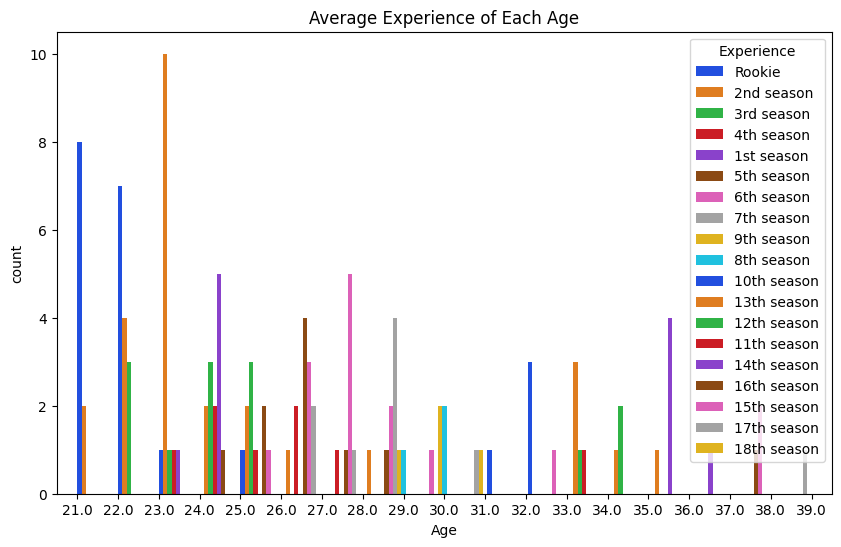

In [19]:
plt.figure(figsize=(10, 6))
plot1 = sns.countplot(data=basic_stats, x="Age", hue="Experience", width=2, palette='bright').set(title="Average Experience of Each Age")

plt.savefig("ExperienceofEachAge.png", dpi=600)

#### Figure 2

Outcome of Games and Location (Home or Away) for ALL QUARTERBACKS.  The graph below displays the Home-field advantage, but not as accurately or prominently as Figure 3 below.

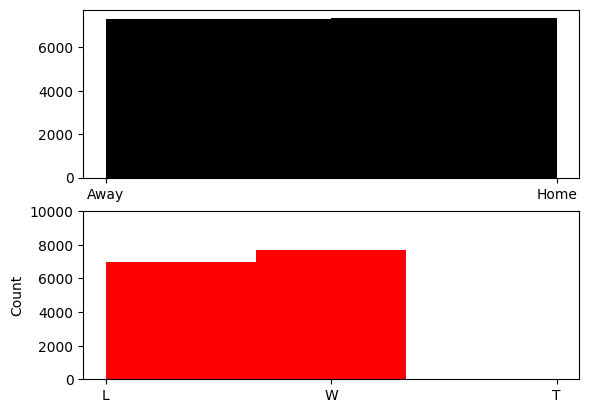

In [20]:
# Create grid of plots
fig, axes = plt.subplots(2, 1);     

# Adds corresponding plot to the index 
plt.ylim(0, 10000)
axes[0].hist(data = qb_stats, x = "Home or Away", bins=2, color="black")
axes[1].hist(data = qb_stats, x = "Outcome", bins = 3, color="red")
plt.ylabel("Count")

plt.savefig("OverallOutcome.png", dpi=600)

#### Figure 3

Narrowed Outcome and Location down for an INDIVIDUAL PLAYER, Tom Brady, for higher efficiency.  The graph below very clearly and accurately displays the Home-field advantage effect, the comparison between whether a team wins or loses when playing at their home field or travelling.  This graph is a major factor in the final statistical analysis of this report.

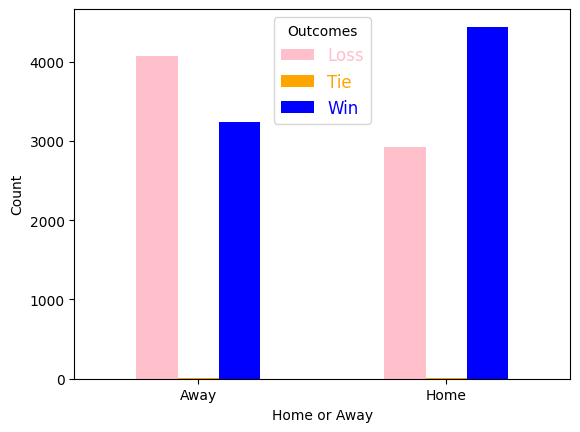

In [21]:
outcome_barplot = grouped_outcome.plot.bar(stacked=False, color = ["pink", "orange", "blue"])
plt.legend(title="Outcomes", 
           loc='upper center',
           fancybox=True,
           labelcolor=['pink', 'orange', 'blue'],
           prop={'size': 12},
           labels = ['Loss', 'Tie', 'Win'])

plt.ylabel("Count")
plt.xlabel('Home or Away')
plt.xticks(rotation=0)

#Must save the image before showing it
plt.savefig("LocationVsOutcome.png", dpi=600)

plt.show(outcome_barplot)

#### Figure 4

This graph is not used in the analysis, but helps understand the average height of the quarterbacks, which can then be used when comparing the height and the rushing yards

Only one Quarterback height outlier in the Basic Stats dataset

1
The Tallest Quarterback in the NFL is:  17116    Osweiler, Brock
Name: Name, dtype: object


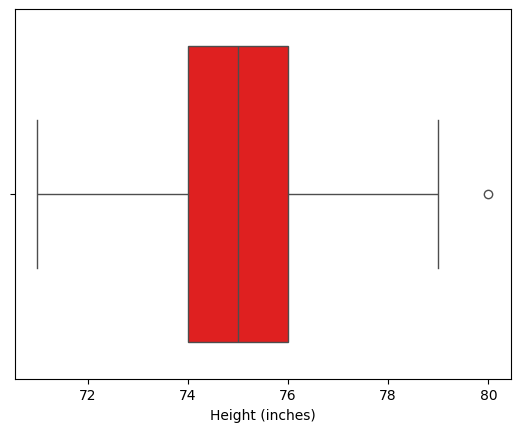

In [22]:
box_plot = sns.boxplot(x=basic_stats["Height (inches)"], color='red')    #shows variation on either side of dataset

filtered_outliers = basic_stats[(basic_stats['Height (inches)'] > 79) & (basic_stats['Height (inches)'] < 83)]
outlier_count = filtered_outliers['Height (inches)'].count()
print(outlier_count)

player_outlier = basic_stats[basic_stats['Height (inches)'] == 80]

print("The Tallest Quarterback in the NFL is: ", player_outlier['Name'])

#### Figure 5

Merges the individual columns from the two CSV files, allowing for the comparison between Height in inches and the Rushing Yards of a quarterback, respectively.

The 'violin plot' accurately shows the data but also allows the visualization of the variation amomngst the columns 

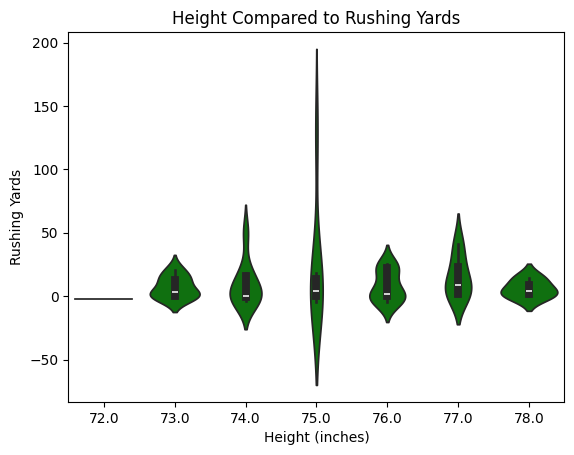

In [23]:
#Merges the Height and Rushing Yards for each individual player
merged_data = pd.merge(basic_stats, qb_stats, left_index=True, right_index=True, suffixes=('_file1', '_file2'))
comparison = merged_data.loc[:, ['Height (inches)', 'Rushing Yards']]

# Scatter plot of two discrete variables
plot = sns.violinplot(data=comparison, x = "Height (inches)", y = "Rushing Yards", color="green")
plt.title("Height Compared to Rushing Yards")

plt.savefig("HeightVsYards.png", dpi=600)

#### Figure 6

Merges data from the two CSV files, comparing the Weight of the quarterbacks to their corresponding rushing yards

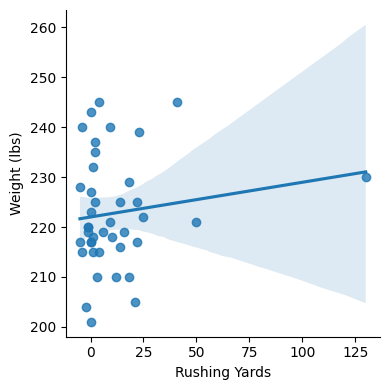

In [24]:
#Merges the Weight and Rushing Yards by the Player Names
merged_data = pd.merge(basic_stats, qb_stats, left_index=True, right_index=True, suffixes=('_file1', '_file2'))
comparison = merged_data.loc[:, ['Weight (lbs)', 'Rushing Yards']]

# Scatter plot of two discrete variables
comparison_plot = sns.lmplot(data=comparison, x="Rushing Yards", y="Weight (lbs)", height=4)

plt.savefig("YardsVsWeight.png", dpi=600)

#### Figure 7

Data below is too large to analyze all passes attempted and completed, so I specified it to one player

For graph below, as the row numbers increase, the seasons goes further back.
i.e. Row 10,600 is the 2016 football season whereas Row 10,900 is the 2001 football season

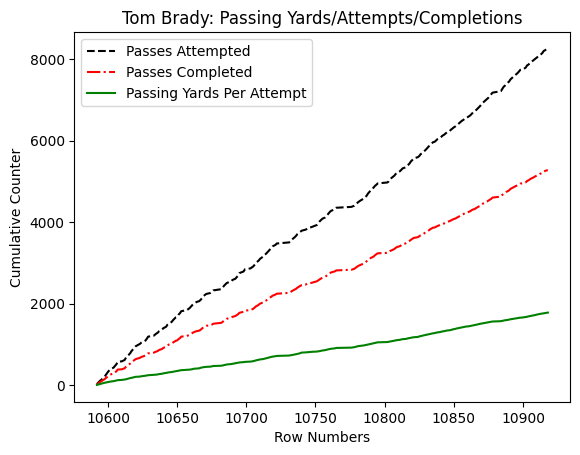

In [25]:
fig, ax = plt.subplots()

#Takes the cumulative sum for each column, steeper slope means more passes
ax.plot(player_stats['Passes Attempted'].cumsum(), color="black", linestyle="dashed", label="Passes Attempted")
ax.plot(player_stats['Passes Completed'].cumsum(), color="red",linestyle="dashdot", label="Passes Completed")
ax.plot(player_stats['Passing Yards Per Attempt'].cumsum(), color="green",linestyle="solid", label="Passing Yards Per Attempt")

# Making more user friendly
ax.set_title("Tom Brady: Passing Yards/Attempts/Completions")
ax.set_xlabel("Row Numbers")
ax.set_ylabel("Cumulative Counter")
ax.legend()

In [27]:
import os
print(os.getcwd())
# Save image to use in questioning
fig.savefig("PassingComparison.png", dpi=600)

c:\DataAnalysis\Assignment


## **Discussion**

Although Figure 1 (below) is very condensed and not as user-oriented, the general statistics can still be examined.  It can be seen that the majority of Rookies entering the professional league are between 21 and 22 years old.  This is expected since the minimum age to enter or be recruited to an NFL team is 21, but this youthfulness allows for plenty of opportunity to stem from the traditional athletic development to focus on specific areas that need development to increase overall skill.  A majority, if not all, players of that age were recruited or joined shortly after college to ensure they progress as far as physically possible while they are still in their prime.  It can also be viewed that players older than 35 years old have at least 13 years/seasons under their belt.  American football is a very physically demanding sport, putting the players under immense physical strain.  Over the years of playing the injuries pile up and the healing begins to slow down.  Due to this, as players approach 40 years old they tend to retire as physical health concerns and the natural aging process catch up to them.

![image.png](ExperienceofEachAge.png)

A similar relationship is explained more in-depth in the 'further questioning' section of this analysis, but the same pattern applies.  Figure 2 (below) is yet another instance of the Home Field Advantage effect, this time applying to the overall Win/Loss Statistic for all quarterbacks in the NFL rather than just an individual studied below.  The influence of playing on their home turf gives the team a sub-conscious confidence boost which leads to an overall increase in effort, heightened morale, and a certain familiarity they do not get when playing elsewhere.  A further analysis of this effect is completed in the section below.

![image.png](OverallOutcome.png)

The physical attribute, of height, is a dynamic element of a quarterback that heavily influences his play style.  Shorter quarterbacks are more likely to run the ball, whereas taller quarterbacks will often hand the ball off for a rushing play.  In football, rushing yards are when the quarterback hands (not throws) the football off to the halfback or fullback for a rushing play.  As seen in Figure 5 below, it does not necessarily follow these assumptions.  Quarterbacks of all height ranges play relatively the same, and do not have any distinct patterns.  But players around 75 inches tall are the most diverse.  They throw the ball to another player but also tend to hand the ball off for a rushing play - whichever is more convenient at the moment.

![image.png](HeightVsYards.png)

The relationship between a football player's physicality as opposed to their in-game performance has previously proven to be unchanged.  Unexpectedly, as seen in Figure 6 (below), there is not a direct relationship between weight and rushing yards.  It is expected that the higher-weight class of quarterbacks will have a higher average of rushing yards, factually being more difficult to bypass a heavier player than a lighter one.  But this is not the case, there is no direct correlation between the weight of the quarterback and the rushing yards they gained.  It appears most of the data is centralized between players weighing 215 lbs to 225 lbs, with the most rushing yards achieved by a player just over 230 lbs with roughly 130 yards.

![image-3.png](YardsVsWeight.png)

## **Further Questioning**

Is there a relationship/correlation between the passing attempts, passes completed, and passing yards per attempt for Tom Brady?

Due to the large data set, I made a subset of the quarterback statistics to analyze easier.  There is a direct relation and positive correlation between the number of passes attempted and the number of passes completed, but this relation is expected since more passes attempted leads to more opportunities to complete the play.  There is also a positive and direct relationship with passing yards per attempt, but this trend stays constant throughout all of the seasons.  The lower row numbers of the graph correspond to the more recent seasons, and the higher row numbers go back as far as the early 2000s.  Analysis of the 'passes attempted' graph, shows that the football seasons in the higher row numbers (to the right of the graph) have a steeper slope increase, and more recent seasons (lower end of the graph) have a less steep slope.  This can lead to the conclusion that Tom Brady passed the ball less often as he gained more experience in the game.  The butterfly effect causes there to be a higher number of passes completed closer to the start of his career (more opportunity to catch when more passes are thrown).  During the analysis of Tom Brady, it was found that the average pass completion percentage was 63.71%.

![image.png](PassingComparison.png)

How does Home Field Advantage factor into the outcome of a game?

Home-field advantage is one of the most acknowledged phenomena in the sports industry.  This in-game edge refers to the sub-conscious benefits a team may gain from playing on their home turf, rather than at an alternate venue.  These benefits extend beyond tangible factors like crowd support/familiar support, familiar surroundings, and reduced travel fatigue.  A study done by the University of Chicago Booth has statistically proven that teams tend to put in more effort and have a higher morale when playing at home, concluding that the Home Field Advantage is a major factor in the outcome [2].  This is accurately shown in Figure 3 (below).  Under the analyses section, the home game win rate calculated for Tom Brady was 57.8%, whereas the win rate for away games was 42.2%.  There is a noticeable difference in the games that Tom Brady and his team won whilst having the home-field advantage compared to the away games.  The study done by Chicago Booth discovered that the overall win rate for home games in American Football is 57.6% [2], whereas the home win rate for Tom Brady was found to be 57.8%.  These two win percentages are extremely close, so it can be accurately concluded that the Home Field Advantage affects the outcome of the match.

![image-2.png](LocationVsOutcome.png)

## Conclusion

From the data presented, many different conclusions can be developed.  We have proven that there is a direct relationship between the venue of a football match and the outcome, with this relation being called the Home Field Advantage, but it is not only prominent in football.  Throughout the analysis, it is evident that there is an underlying factor to which the quarterback of a given team, in this case, Tom Brady, tends to reach their peak within the first 5 seasons of being on an NFL team but after that, they begin to very slowly decline in skill.  Whether this be another cause of aging or more skillful players are brought to light, will never truly be known.  In consideration of the experience a player has, you are more likely to find a player within their first 4 seasons on a team in the professional league than you are a 'football veteran'.

## References

1. CHATGPT used to remove scientific notation from .describe() for quartback stats -- Prompt: "code in python to remove scientific notation from .describe()
2. Study proving by Chicago Booth on 'Home Field Advantage': https://www.chicagobooth.edu/review/home-field-advantage-facts-and-fiction
3. Used Stack to help with error saving image: https://stackoverflow.com/questions/47917537/saving-a-barplot-in-matplotlib-pyplot
4. Used Stack to help with saving bar plot: https://stackoverflow.com/questions/47917537/saving-a-barplot-in-matplotlib-pyplot
5. Pandas used for Data Manipulation
6. Seaborn used for Data Visualization
7. Pandas used for Data Visualization
8. Matplotlib used for Data Visualization
9. Image Used for Introduction: https://www.skysports.com/nfl/news/12118/12782819/nfl-playoffs-schedule-super-bowl-basics-and-everything-you-need-to-know-about-when-and-where-can-you-watch-on-sky-sports
10. CHATGPT used to generate quote about quarterbacks -- Prompt: "short quote about football quarterbacks"

<br> Link for Dataset Website:
<br>https://www.kaggle.com/datasets/kendallgillies/nflstatistics

Documenation Used:
<br>https://seaborn.pydata.org/generated/seaborn.countplot.html
<br>https://matplotlib.org/stable/users/index.html
